In [1]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1.xlsx"
df = pd.read_excel(file_path)

# Check for NaN values
nan_check = df.isnull().values.any()

if nan_check:
    print("There are NaN values in the Excel sheet.")
else:
    print("There are no NaN values in the Excel sheet.")

There are no NaN values in the Excel sheet.


In [2]:
# from sklearn.model_selection import train_test_split

# # Define your features and target variable (assuming 'target' is your target column)
# X = df.drop(columns=['Leq'])  # Replace 'target' with your actual target column name
# y = df['Leq']  # Replace 'target' with your actual target column name


In [3]:

# # Split the data into train (80%) and test (20%) sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Print the sizes of the train and test sets
# print(f"Training set size: {len(X_train)}")
# print(f"Test set size: {len(X_test)}")

Training set size: 368
Test set size: 92


In [8]:
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np


# # Step 1: Replace commas with dots in string numbers
# X_train = X_train.replace(',', '.', regex=True)

# # Apply correlation analysis on the training set (excluding the target column)
# correlation_matrix = X_train.corr()

# # Set a correlation threshold
# threshold = 0.9

# # Create an upper triangle correlation matrix to avoid duplicate pairs
# upper_triangle = correlation_matrix.where(
#     np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))


# # Step 4: Extract column pairs with correlation above the threshold
# correlated_pairs = []

# for column in upper_triangle.columns:
#     for index in upper_triangle.index:
#         if upper_triangle[column][index] > threshold:
#             correlated_pairs.append((column, index, upper_triangle[column][index]))

# # Print the correlated pairs and their correlation values
# print("Highly correlated pairs (correlation > {}):".format(threshold))
# for pair in correlated_pairs:
#     print("Column 1: {}, Column 2: {}, Correlation: {:.2f}".format(pair[0], pair[1], pair[2]))



# # Step 4: Extract column pairs with correlation above the threshold
# correlated_pairs = []
# columns_to_drop = set()  # Use a set to avoid duplicates

# for column in upper_triangle.columns:
#     for index in upper_triangle.index:
#         if upper_triangle[column][index] > threshold:
#             correlated_pairs.append((column, index, upper_triangle[column][index]))

# # Now drop one column from each correlated pair
# for pair in correlated_pairs:
#     col1, col2, _ = pair
#     if col1 not in columns_to_drop and col2 not in columns_to_drop:
#         # Drop the second column in the pair (you can choose which one to drop)
#         columns_to_drop.add(col2)  # Adjust this line if you want to drop col1 instead

# # Drop highly correlated columns from the training set
# X_train_reduced = X_train.drop(columns=columns_to_drop)

# # Print the columns to drop and the resulting DataFrame
# print("Columns to drop due to high correlation:\n", columns_to_drop)
# print("\nTraining set after dropping highly correlated columns:\n", X_train_reduced)

Highly correlated pairs (correlation > 0.9):
Column 1: L50, Column 2: L10, Correlation: 0.96
Column 1: L90, Column 2: L10, Correlation: 0.96
Column 1: L90, Column 2: L50, Correlation: 0.98
Column 1: Shoulder width, Column 2: L50, Correlation: 0.90
Columns to drop due to high correlation:
 {'L10', 'L50'}

Training set after dropping highly correlated columns:
            L90     Speed   Car   2w  3w  LCV  Heavy traffic        %HT  \
455  68.201136  67.733449  532  318   7   58             68   6.917599   
57   62.002416  68.661023  326  285   7   11             19   2.932099   
155  61.182545  65.382852  267  289   4   21             21   3.488372   
290  62.166359  66.765884  184  106   1   10             49  14.000000   
24   60.802417  66.121237  248  244   6   14             20   3.759398   
..         ...        ...  ...  ...  ..  ...            ...        ...   
106  61.796482  69.098065  231  258   9   30             40   7.042254   
270  62.477134  67.802933  161   94   3   21  

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming df is your complete DataFrame and 'target' is the name of your target column
target_column = 'Leq'  # Replace this with your actual target column name

# Step 1: Replace commas with dots in string numbers (if applicable)
df = df.replace(',', '.', regex=True)

# Convert numeric columns to float (if necessary)
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype(float)

# Step 2: Separate features and target
X = df.drop(columns=[target_column])  # Features (excluding target)
y = df[target_column]  # Target variable

# Apply correlation analysis on the entire dataset (excluding the target column)
correlation_matrix = X.corr()

# Set a correlation threshold
threshold = 0.9

# Create an upper triangle correlation matrix to avoid duplicate pairs
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Step 4: Extract column pairs with correlation above the threshold
correlated_pairs = []
columns_to_drop = set()  # Use a set to avoid duplicates

for column in upper_triangle.columns:
    for index in upper_triangle.index:
        if upper_triangle[column][index] > threshold:
            correlated_pairs.append((column, index, upper_triangle[column][index]))

# Now drop one column from each correlated pair
for pair in correlated_pairs:
    col1, col2, _ = pair
    if col1 not in columns_to_drop and col2 not in columns_to_drop:
        # Drop the second column in the pair (you can choose which one to drop)
        columns_to_drop.add(col2)  # Adjust this line if you want to drop col1 instead

# Drop highly correlated columns from the entire dataset
X_reduced = X.drop(columns=columns_to_drop)

# Add the target column back to the reduced DataFrame
reduced_df = pd.concat([X_reduced, y.reset_index(drop=True)], axis=1)

# Print the correlated pairs, columns to drop, and the resulting DataFrame
print("Highly correlated pairs (correlation > {}):".format(threshold))
for pair in correlated_pairs:
    print("Column 1: {}, Column 2: {}, Correlation: {:.2f}".format(pair[0], pair[1], pair[2]))

print("\nColumns to drop due to high correlation:\n", columns_to_drop)
print("\nDataset after dropping highly correlated columns:\n", X_reduced)


Highly correlated pairs (correlation > 0.9):
Column 1: L50, Column 2: L10, Correlation: 0.96
Column 1: L90, Column 2: L10, Correlation: 0.96
Column 1: L90, Column 2: L50, Correlation: 0.98

Columns to drop due to high correlation:
 {'L10', 'L50'}

Dataset after dropping highly correlated columns:
            L90     Speed   Car   2w  3w  LCV  Heavy traffic       %HT  \
0    59.824617  61.808820  210  237   6   10             17  3.541667   
1    60.079635  59.440556  207  219   6   15             20  4.282655   
2    59.885639  60.354065  200  236   2   11             19  4.059829   
3    59.583686  63.814342  237  262   5   13             20  3.724395   
4    59.698275  67.122706  252  260  10    7             18  3.290676   
..         ...        ...  ...  ...  ..  ...            ...       ...   
455  68.201136  67.733449  532  318   7   58             68  6.917599   
456  68.106058  69.533363  446  344   4   31             85  9.340659   
457  68.301136  69.191092  548  278   1   35

In [15]:
# Save the reduced DataFrame as a new Excel file
output_file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/reduced_data_traffic.xlsx"  # Update the path as needed
reduced_df.to_excel(output_file_path, index=False)

print(f"\nReduced dataset saved to: {output_file_path}")


Reduced dataset saved to: C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/reduced_data_traffic.xlsx


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Load the data (replace with your file path)
file_path = 'reduced_data_traffic.xlsx'
data = pd.read_excel(file_path)

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq'])
y = data['Leq']

# Initialize scalers
minmax_scaler = MinMaxScaler()

# Option 2: Min-Max Scaling (scaling to [0, 1])
X_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)


Decision Tree Results:
MSE: 2.162004031198081, MAE: 1.040168158583778, RMSE: 1.4703754728633367
Feature Importance (Decision Tree):
Shoulder width    0.769541
Car               0.041510
Temp.             0.040889
Heavy traffic     0.023905
Speed             0.022391
2w                0.022201
L90               0.021199
%HT               0.016951
RH                0.015510
LCV               0.009930
3w                0.008770
WS                0.007130
Median width      0.000075
dtype: float64

Random Forest Results:
MSE: 0.7797567327616295, MAE: 0.7193842119533589, RMSE: 0.8830383529392307
Feature Importance (Random Forest):
Shoulder width    0.733104
L90               0.076234
Car               0.028331
2w                0.024964
Heavy traffic     0.024400
Speed             0.024177
Temp.             0.022440
%HT               0.016247
3w                0.015480
LCV               0.014341
RH                0.011423
WS                0.008755
Median width      0.000103
dtype: float64


In [24]:
data.var()


L90                  8.362040
Speed               16.405246
Car               6001.408786
2w                9811.644103
3w                  11.775102
LCV                116.153315
Heavy traffic      370.564038
%HT                 14.202288
Median width         0.035237
Shoulder width       1.068400
Temp.               28.806752
RH                  79.878962
WS                  15.625703
Leq                  5.427586
dtype: float64

In [25]:
corr_matrix = data.corr()
print(corr_matrix['Leq'])


L90               0.858651
Speed            -0.145071
Car               0.600849
2w                0.487152
3w               -0.220730
LCV               0.593836
Heavy traffic     0.691045
%HT               0.095292
Median width      0.386782
Shoulder width    0.836783
Temp.             0.318897
RH               -0.120845
WS                0.203369
Leq               1.000000
Name: Leq, dtype: float64


<Axes: >

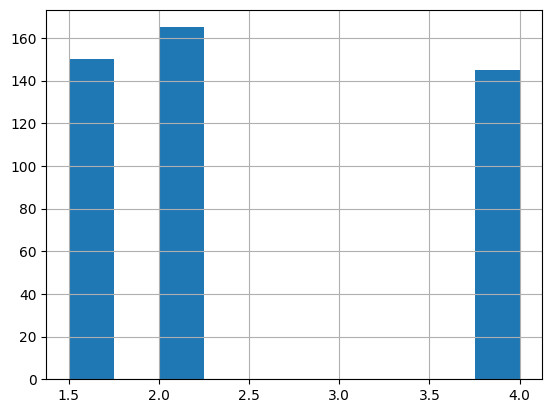

In [19]:
data['Shoulder width'].hist()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the data (replace with your file path)
file_path = 'reduced_data_traffic.xlsx'
data = pd.read_excel(file_path)

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'Shoulder width', 'L90', 'Median width'])
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)


DecisionTreeRegressor(random_state=42)

Decision Tree Results:
MSE: 3.872664093703557, MAE: 1.4898095762195975, RMSE: 1.967908558267776
Feature Importance (Decision Tree):
Heavy traffic    0.588455
Temp.            0.162604
Car              0.060936
2w               0.054581
LCV              0.047658
Speed            0.029002
RH               0.018282
%HT              0.017229
3w               0.011876
WS               0.009376
dtype: float64


RandomForestRegressor(random_state=42)


Random Forest Results:
MSE: 1.2661063254666451, MAE: 0.8746791442468209, RMSE: 1.1252139020944618
Feature Importance (Random Forest):
Heavy traffic    0.574852
%HT              0.090823
Car              0.075735
2w               0.065805
Temp.            0.055107
3w               0.047462
LCV              0.037022
Speed            0.029284
RH               0.013603
WS               0.010305
dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance

# Load the data (replace with your file path)
file_path = 'reduced_data_traffic.xlsx'
data = pd.read_excel(file_path)

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq'])
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple ANN model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with an optimizer and loss function
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)


In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
